# Gherkin Syntax

Gherkin syntax is commonly referred to as **`Given-When-Then`** for the three required keywords.

**Syntax:**
* Given some precondition: conditions required to put the system into the state it needs to be to perform the tests.
* When some event happens: actions that the user takes to interact with the system under test.
* Then some testable outcome is observed: expected outcome of the action that the user performs.

**Example:** Consider an e-commerce application

```
Given I have two items in my shopping cart
When I remove an item from my cart
Then I should only have one item in my shopping cart
```

# Given-When-Then-And-But

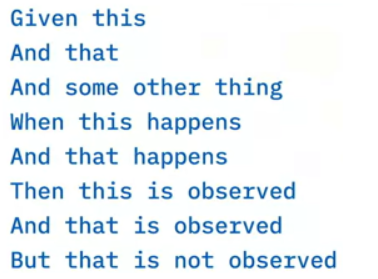

* To improve readability, you can also use the `And` & `But` keywords.
* Note that "`And`" & "`But`" will always take on the meaning of the previous `Given`, `When`, or `Then` that comes before it

# BDD Specification: Feature & Scenarios

**Feature**
* A BDD specification is made up of one or more features, which represent user stories.
* Best practice is to have separate file for each feature.
* Feature description follows the standard user-story syntax from agile practices. 

**Feature Syntax**

```
Feature: <title>

As some <role>
I want some <functionality>
So that I gain some <benefit>
```

**Scenarios**
* Each feature contains one or more concrete examples or scenarios.
* **A scenario is a situation that describes a single behavior of a feature.**
* You use the **`Given-When-Then`** syntax to write that description.
* **Each scenario is equivalent to a complete test case for the behavior.**
* Write as many scenarios as you need to describe the various behaviors of the feature.

# Example of Retail BDD Specification

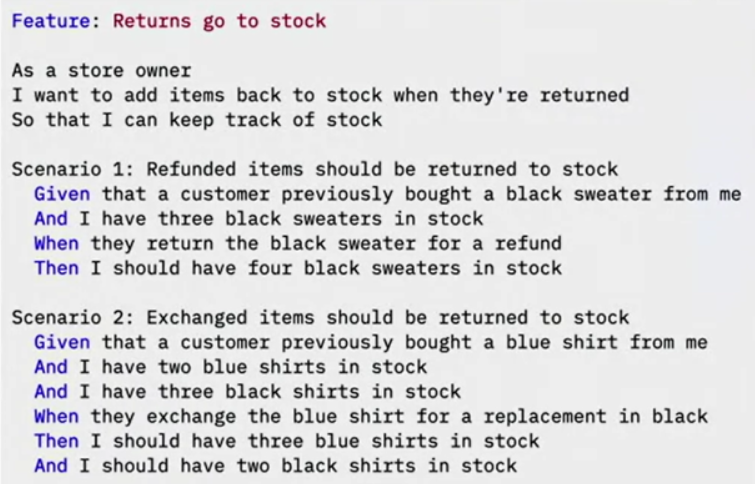

* What’s great about the BDD specification is that this document is exactly what you build together with your stakeholders.
* This is the document that you use a BDD tool like Behave to run your BDD tests.
* You have one document that everyone can understand, including your test tools.

# Behave folder structure

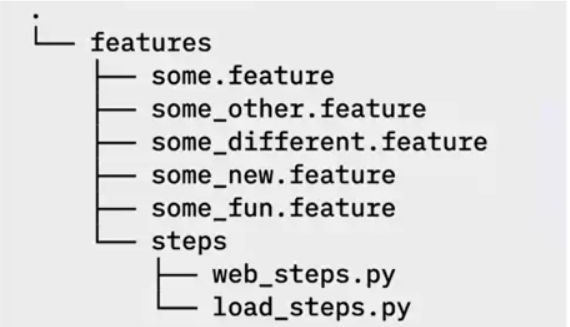

* Behave looks for a folder named “**features**”.
* Inside the features folder, Behave looks for files with an extension of **"`.feature`"**.
* Behave will process each one it finds in the **features** folder.
* The features folder also contains a subfolder called “**steps**”.
* Inside the **steps folder** is a collection of python files that have the steps that match the **Gherkin** statements in the **feature** files.
* Convention for **steps file** is to use “`_steps`” in the name to signify that they’re steps files
* Best practice suggests that you place all of the generic steps that manipulate the web interface, regardless of application, into a file called “**`web_steps.py`**”.
* If you have additional Python files containing steps, you could store them in the steps folder as well, such as, **`load_steps.py`** for loading sample data for scenarios.
* Behave will load all of the steps in the python files in this folder.

> **Note:**
> * *There is `no one-to-one correlation between the feature files and the step files`.*
> * *For example, I can have `5 feature files` but only `two step files`.*
> * *As long as the python steps cover all of the statements in the `.feature` files, everything will work.*

# Using Behave

First you need to **set up your folder structure correctly**.
* You **create** your **features folder** and your **feature files**, and your **steps folder** under that for your **python steps files**.
* Once your folders and files are set up, you **run the behave tool from within the parent of that features folder**.

**Behave**:
* reads the steps in each feature file, 
* looks for a matching python step in the steps files, and 
* executes those functions.

# Behave step matching logic

1. Behave reads through each scenario of the feature file, step by step.
2. It processes each step’s keyword (Given, When, Then) and the text string which follows.
3. Finds a matching keyword decorator and text string pair in the python steps file.
4. Executes that function.

> **Notes:**
> * All of the python functions in this file have the same name: **“`step_impl`”**
> * Behave will ignore these function names.
> * It only looks for the python decorators **(`@given`, `@when` and `@then`)** that wrap the functions and the text string pattern.
> * Also the steps do not have to be in any particular order in the steps file.
> * Behave will find them regardless of the order of appearance in the file.

# Behave test fixtures

Behave has a set of **test fixtures** that you could run before or after **feature**, **scenarios**, **steps**, or **tags** to control the test execution environment.

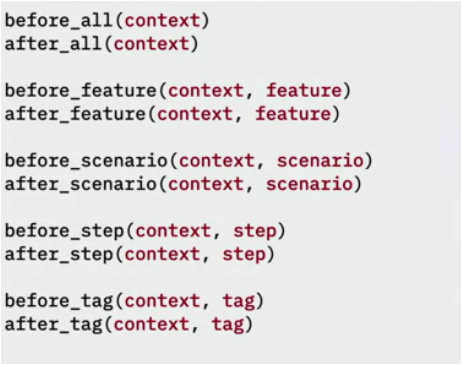

# Set up environment.py

You set up your behave environment in a file called `environment.py`, and this is where you declare your test fixtures.

Let's look at a simple environment.py that uses the `before_all()` and `after_all()` functions.

Obviously, you could add more text fixtures to this file and you can have them execute **before** and **after** each **feature**, **scenario**, **step**, or **tag**.

This one file `environment.py` controls the environment at whatever level of granularity you need.

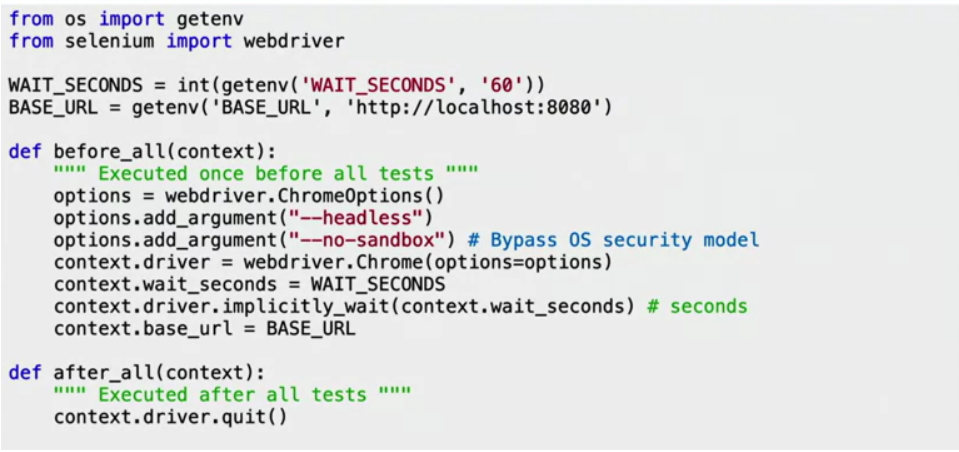

# Feature writing tips

**Strive for consistency:**
* Be consistent while writing step.
* Don't write steps in multiple way which performs the same function.
* Say you have the string “I see” in one Gherkin statement and “I should see” in another

**Make steps generic:** so that they can be reused and avoid duplication.

**Consider the user experience:** always write the feature files as if you were explaining how to use the feature to the user, not what the feature does under the hood.
Includes message or indicators **(built-in cues)** which signals that the system has responded to a request.


# Example: Search for pets by category

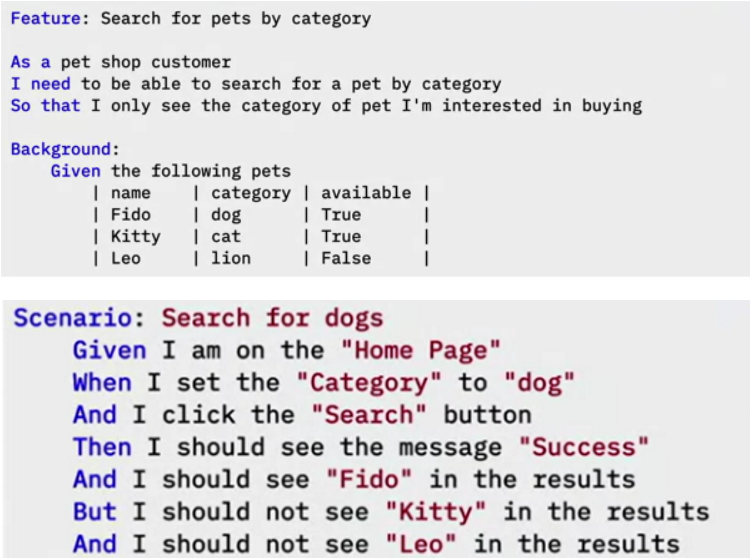

# Writing step file: step Implementation

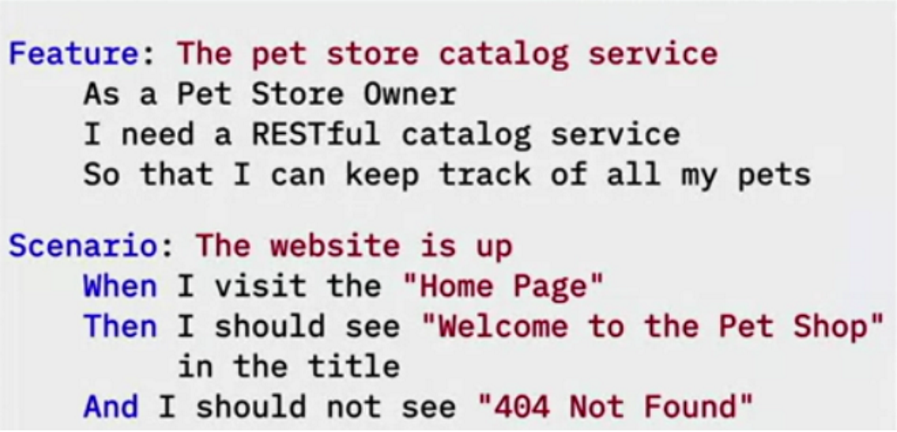

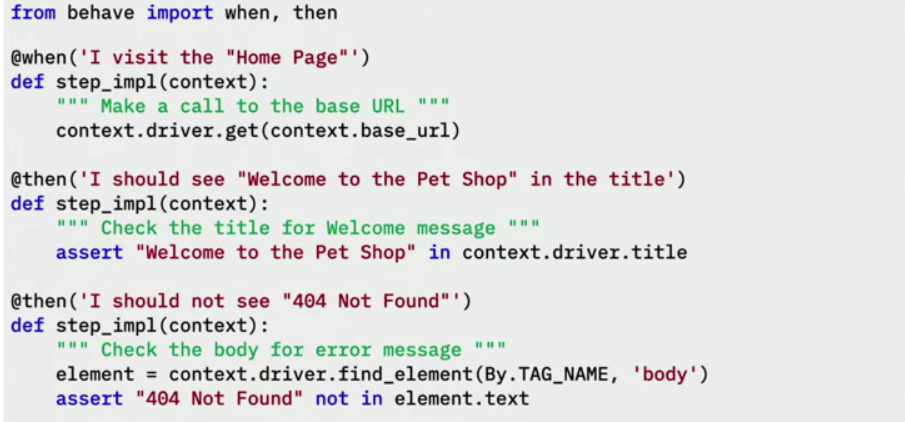

# Loading test data

* Test cases often need test data.
* Behave allows to specify test data directly in your feature file using the **`Background`** section.
* In the **`Background`** section, you can specify the initial state of the data you want to start with.
* The only problem is that the data doesn’t load itself; you need to load it manually.
* You might ask, **“`How do I do that?`”**
* Luckily, Behave puts the data in a variable in the **`context`** called **`table`**.
* That means you can iterate over **`context.table`** and extract the data.

# Loading data from `context.table`

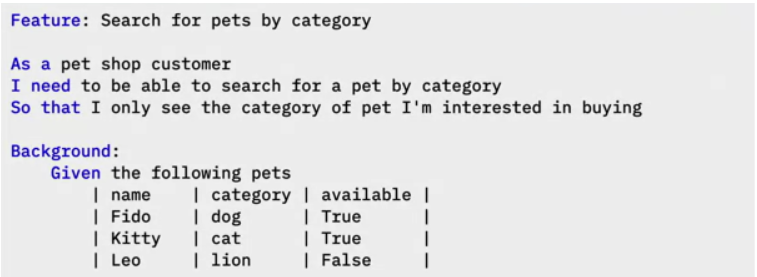

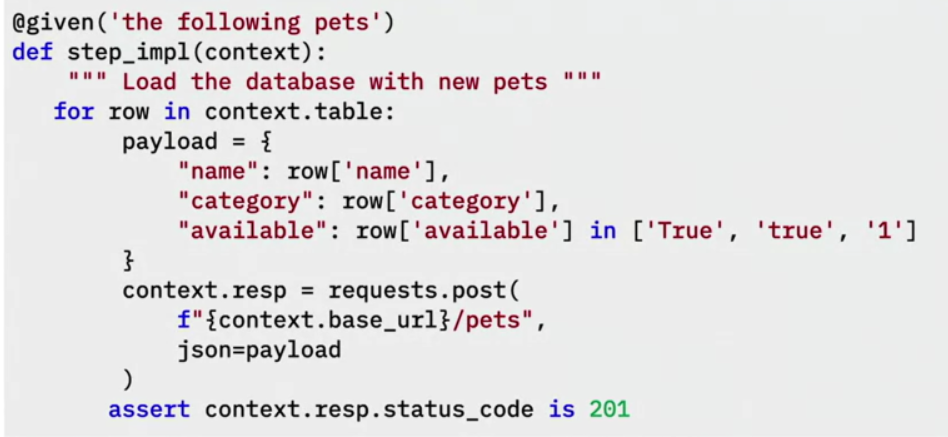

# Generating steps using behave

Something that’s great about the **Behave tool** is that it **can generate steps for you**.
* They could be the initial steps when you’re just starting out or any steps that are missing as you’re working on your feature scenarios.
* Just **run behave against your feature file and it will show you the missing steps**.
* If you haven’t written any steps, then the first time you run Behave, all of the steps are missing.
* If this is the case, Behave will actually seed your development efforts with a set of suggested steps.

## Run Behave against a feature file

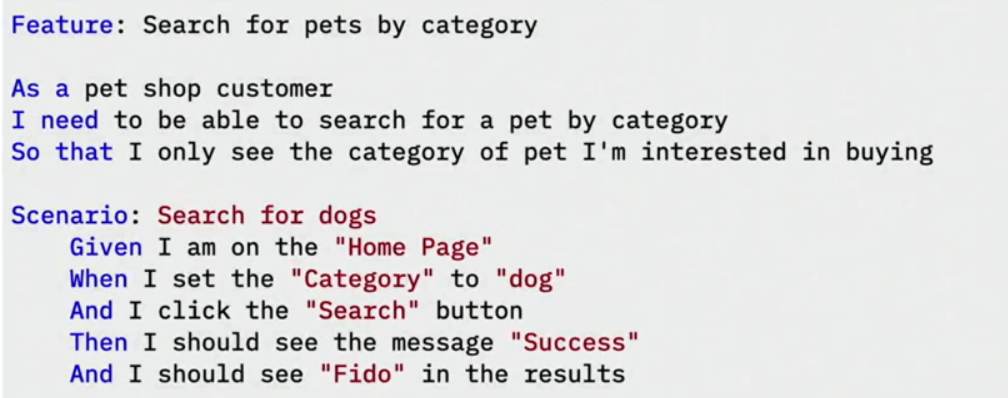

## Initial output from Behave

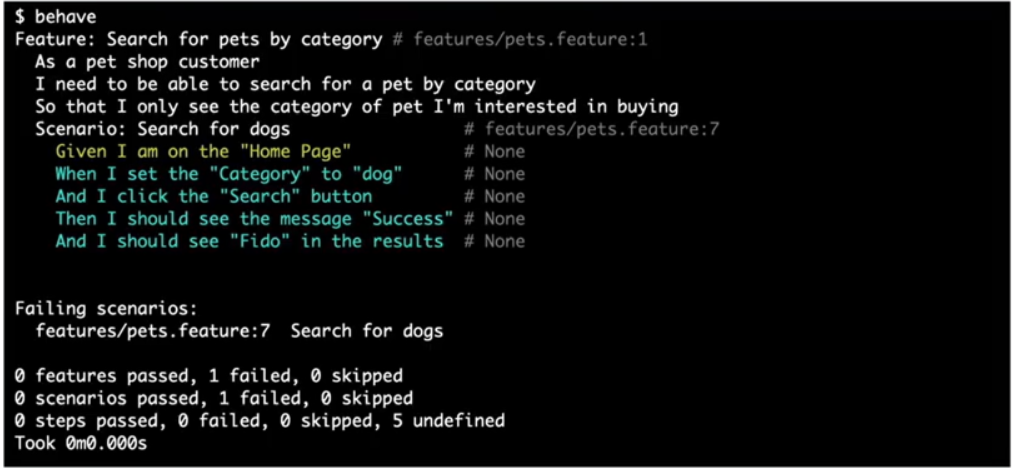

## Steps recommendation from Behave

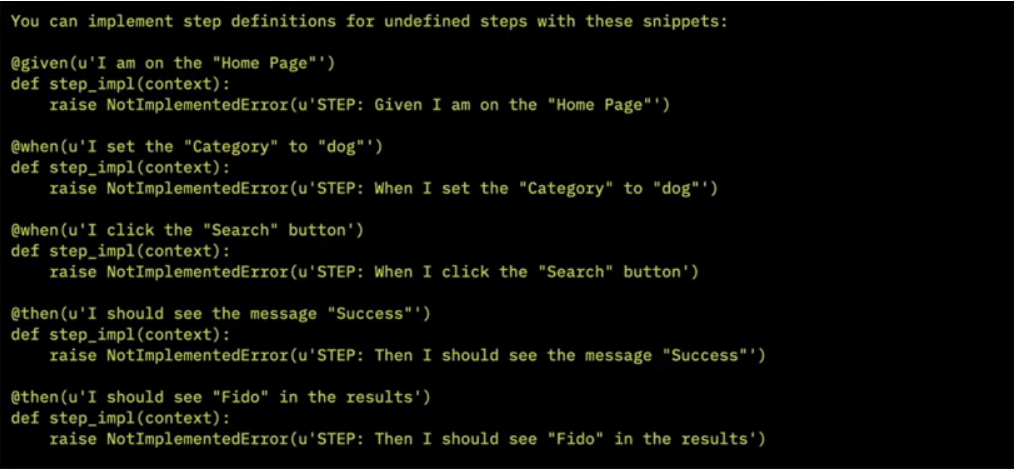

**Implements the steps and again run behave.**

# Working with `context` variable

* The context variable is passed into every step definition, so all of the step functions that you write will have a variable called context as the first argument.
* You can think of it as a **container** or a bag to put stuff in, take stuff out, and pass it around.
* **It exists for the duration of the entire feature file and all of the steps.**
* **Every step called from the feature file will share the same context.**
* That lifespan makes context useful for passing information from one step to the next--or any future step that might need that information.

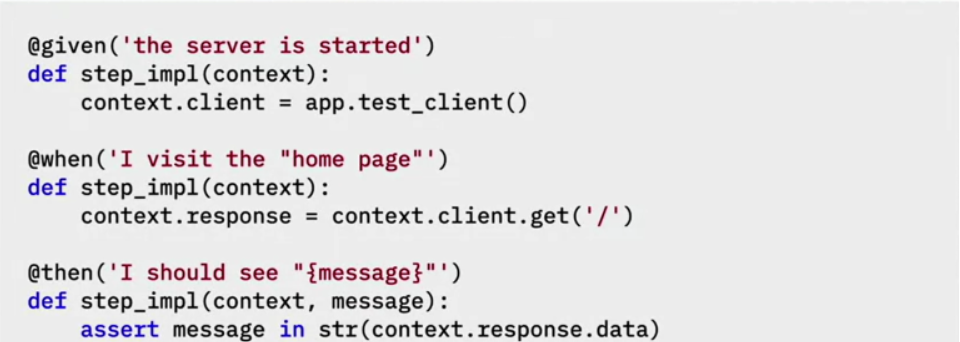

# Example: clipboard simulation using `context` variable

Occasionally, you need to copy information from one field and paste it into another.

But unfortunately, **Selenium doesn’t support clipboards.**

This is a little trick that is used to simulate copy-and-paste using a clipboard.

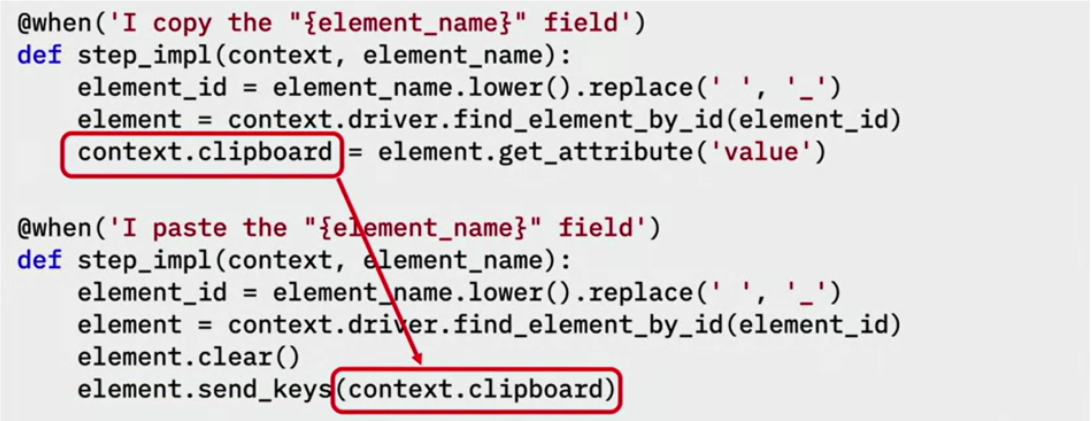

# Using variable substitution

You can use variable substitution:
* To make your python steps more generic.
* Minimizes the number of steps.
* Leads to greater reusability.

## Scenario to create a pet

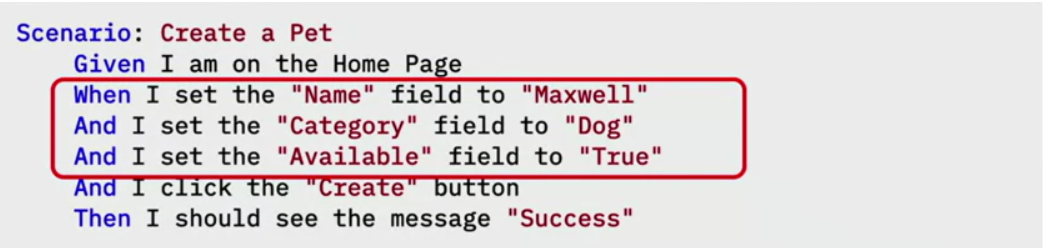

## Without variable substitution

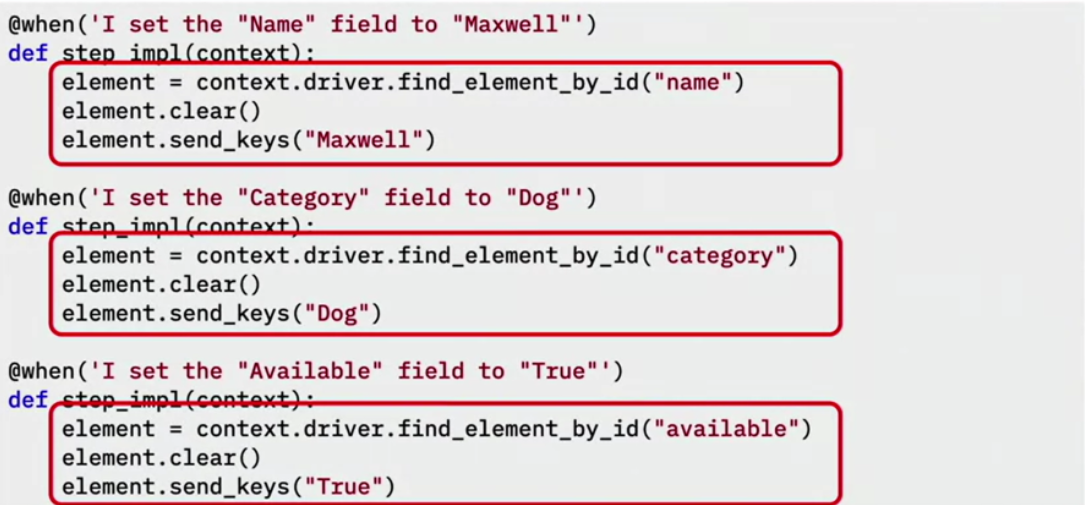

## Variable analysis

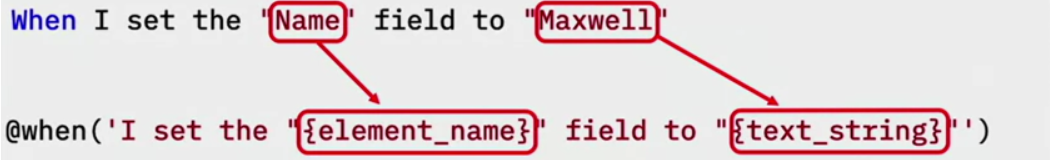

## With variable substitution

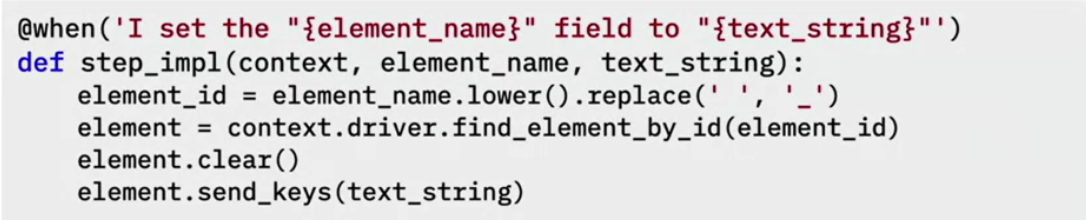